This data comes from https://www.kaggle.com/datasets/rohitudageri/credit-card-details/data

In [1]:
import pandas as pd

In [2]:
!ls

Credit_card.csv       Credit_card_label.csv hw5.ipynb


In [3]:
cols_files = pd.read_csv("Credit_card.csv")
label_file = pd.read_csv("Credit_card_label.csv")

Let's join the tables on their ids

In [4]:
df.merge?

Object `df.merge` not found.


In [5]:
df = cols_files.merge(label_file, on="Ind_ID")
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


Now that we have all of our data, let's do some cleanup. We can drop the id column to start as it is no longer needed and doesn't hold any significance in terms of predicting our target. We can also drop the email and phone number columns.

In [6]:
df.drop("Ind_ID", axis=1,inplace=True)

In [7]:
df.drop(["Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID"], axis=1, inplace=True)

### Handling NA values

In [8]:
df.isna().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

To fill the above NA values we will use the following strategy. For gender we will assign the mode since male/female is about 50% so it doesn't really matter. For annual income and birthday count, we will assign the mean value and for type occupation we will assign a dummy value of Other. Let's also rename the gender, children, and education columns so they aren't in all caps.

In [9]:
df.rename(columns={"GENDER": "Gender", "CHILDREN": "Children", "EDUCATION": "Education"}, inplace=True)

In [10]:
mode_gender = df.Gender.mode()[0]
mean_income = df.Annual_income.mean()
mean_birthday = df.Birthday_count.mean()
mode_gender, mean_income, mean_birthday

('F', 191399.3262295082, -16040.342070773264)

In [11]:
df["Gender"].fillna(mode_gender, inplace=True)
df["Annual_income"].fillna(mean_income, inplace=True)
df["Birthday_count"].fillna(mean_birthday, inplace=True)
df["Type_Occupation"].fillna("Other", inplace=True)

In [12]:
df.isna().sum()

Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

### Numeric features

In [13]:
import numpy as np
df.describe(include=np.number)

,Children,Annual_income,Birthday_count,Employed_days,Family_Members,label
count,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499,0.113049
std,0.776691,1.124080e+05,4199.321477,137808.062701,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19476.000000,-3174.500000,2.000000,0.000000
50%,0.000000,1.710000e+05,-15814.500000,-1565.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12483.000000,-431.750000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


In [14]:
df.query("Employed_days > 0 & Employed_days < 365243")

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label


Upon further inspection, it seems as though the employed days field is corrupt. Negative numbers are supposed to represent days employed while positive numbers should represent days unemployed. However, the only positive numbers in the column are 365243 which occurs 261 times. This is equal to 1000 years which is impossible. There are two potential options. Either assume they are all employed and set the Employed_days field for all such values to the mean of uncorrupted values or change the column to a binary employed or unemployed. I think it is safer to assume that the subjects in these rows were in fact unemployed but the number of days is incorrect so we will switch this to a binary column.

In [15]:
df["Employed"] = np.where(df.Employed_days < 0, "Y", "N")
df.drop("Employed_days", axis=1, inplace=True)
df

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Type_Occupation,Family_Members,label,Employed
0,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,Other,2,1,N
1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,Other,2,1,Y
2,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,Other,2,1,Y
3,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,Other,2,1,Y
4,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,Other,2,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,Managers,2,0,Y
1544,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,Accountants,1,0,Y
1545,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,Managers,4,0,Y
1546,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,Drivers,2,0,Y


Birthday count is also an intrisicly strange field. Let's change that to Age_days and update the values accordingly (make them positive).

In [16]:
df.rename(columns={"Birthday_count": "Age_days"}, inplace=True)
df["Age_days"] = df.Age_days * -1
df.Age_days

0       18772.000000
1       13557.000000
2       16040.342071
3       13557.000000
4       13557.000000
            ...     
1543    11957.000000
1544    10229.000000
1545    13174.000000
1546    15292.000000
1547    16601.000000
Name: Age_days, Length: 1548, dtype: float64

Lastly, since salary does not scale linearly, let's apply a log to that to make it a more linear distribution. The distributions before and after the log is applied are shown below.

<AxesSubplot: >

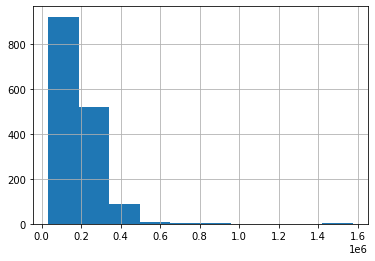

In [17]:
df.Annual_income.hist()

<AxesSubplot: >

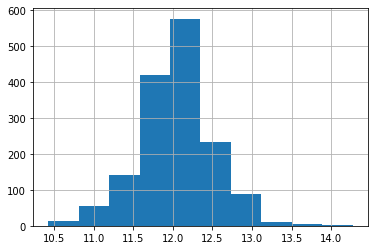

In [18]:
np.log1p(df.Annual_income).hist()

In [19]:
# Apply this change to df
df["log_income"] = np.log1p(df.Annual_income)
df.drop("Annual_income", axis=1, inplace=True)

### Categorical Variables

In [20]:
df.rename(columns={"Propert_Owner": "Property_owner"}, inplace=True)
df.columns

Index(['Gender', 'Car_Owner', 'Property_owner', 'Children', 'Type_Income',
       'Education', 'Marital_status', 'Housing_type', 'Age_days',
       'Type_Occupation', 'Family_Members', 'label', 'Employed', 'log_income'],
      dtype='object')

Because this is just for practice, we are going to limit the number of features to make things simpler. This will include dropping some columns and thinning out some of the categorical columns.

In [21]:
# Used value_counts() function to evaluate how many unique values each categorial var had
cols_to_drop = ["Type_Income", "Housing_type", "Type_Occupation"]
df.drop(columns=cols_to_drop, inplace=True)

Let's now update education to be higher education or not higher education. We will take a similar strategy with marital status, setting it to married or not.

In [22]:
df["Education"] = df.Education == "Higher education"
df.rename(columns={"Education": "Higher_education"}, inplace=True)
df["Higher_education"] = np.where(df.Higher_education, "Y", "N")

In [23]:
df["Marital_status"] = np.where(df.Marital_status == "Married", "Y", "N")
df.rename(columns={"Marital_status": "Married"}, inplace=True)

In [24]:
df_final = pd.get_dummies(df, columns=["Gender", "Car_Owner", "Property_owner", "Higher_education", "Married", "Employed"], drop_first=True)

Lastly, for clarity let's move the target to the last column

In [25]:
target = df_final.pop("label")
df_final.insert(df_final.shape[1], "target", target)
df_final

,Children,Age_days,Family_Members,log_income,Gender_M,Car_Owner_Y,Property_owner_Y,Higher_education_Y,Married_Y,Employed_Y,target
0,0,18772.000000,2,12.100718,1,1,1,1,1,0,1
1,0,13557.000000,2,12.660331,0,1,0,1,1,1,1
2,0,16040.342071,2,12.660331,0,1,0,1,1,1,1
3,0,13557.000000,2,12.162122,0,1,0,1,1,1,1
4,0,13557.000000,2,12.660331,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1543,0,11957.000000,2,12.162122,0,0,1,1,1,1,0
1544,0,10229.000000,1,12.323860,0,0,0,0,0,1,0
1545,2,13174.000000,4,12.100718,1,1,1,1,1,1,0
1546,0,15292.000000,2,12.506181,1,1,0,0,0,1,0


## Linear Regression

In [26]:
import torch

In [27]:
t_dep = torch.tensor(df_final.target, dtype=torch.float)
t_ind = torch.tensor(df_final.iloc[:,:-1].values, dtype=torch.float)
t_ind.shape, t_dep.shape

(torch.Size([1548, 10]), torch.Size([1548]))

To ensure that the model isn't dominated by one column, we will divide each of the columns by their maximum value. This will make all values in the table between 0 and 1.

In [28]:
values, _ = t_ind.max(axis=0)
t_ind = t_ind / values

### Initial Predictions

In [29]:
torch.manual_seed(1234)
coefs = torch.randn(t_ind.shape[1]) - 0.5
coefs

tensor([-0.4539, -0.0976, -1.5115, -0.2833, -1.1123,  0.0036, -0.2690,  0.1931,
        -0.7669,  1.6785])

In [30]:
first_pred = t_ind@coefs
((first_pred > 0.5) == t_dep.bool()).float().mean()

tensor(0.7468)

In [31]:
def calc_accuracy(preds, targets):
    return ((preds > 0.5) == targets.bool()).float().mean()

We got lucky with our initial coefficients and have an accuracy of 75%. We can improve this by performing gradient descent.

### Split Data into Test / Validation Sets

In [32]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=2)(df_final)

In [33]:
trn_indep,val_indep = t_ind[trn_split],t_ind[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
trn_indep.shape, val_indep.shape

(torch.Size([1239, 10]), torch.Size([309, 10]))

### Gradient Descent

In [34]:
def init_coeffs(n_coeff): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [35]:
def calc_preds(coefs, data): return torch.sigmoid(data@coefs)

In [36]:
def calc_loss(coefs, data, targets): return torch.nn.functional.mse_loss(calc_preds(coefs,data), targets)

In [37]:
def one_epoch(coefs, lr):
    loss = calc_loss(coefs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad():
        coefs.sub_(coefs.grad * lr)
        coefs.grad.zero_()
    print(f"{loss:.3f}", end="; ")

In [38]:
def train_model(data, targets, lr=0.01, epochs=20):
    torch.manual_seed(90)
    coefs = init_coeffs(data.shape[1])
    for i in range(epochs): one_epoch(coefs, lr)
    return coefs

In [39]:
trained_coefs = train_model(trn_indep, trn_dep, lr=5)

0.275; 0.101; 0.100; 0.100; 0.100; 0.100; 0.100; 0.100; 0.100; 0.099; 0.099; 0.099; 0.099; 0.099; 0.099; 0.099; 0.099; 0.099; 0.099; 0.098; 

In [40]:
trained_coefs

tensor([-0.3383, -0.4191, -0.2569, -0.6335, -0.3041, -0.4412, -0.5003,  0.2381,
        -0.3809, -0.8993], requires_grad=True)

In [41]:
calc_accuracy(calc_preds(trained_coefs, val_indep), val_dep)

tensor(0.8673)

After gradient descent, our accuracy is now up to almost 87%! Now let's try using a neural network to see if we can improve our result.

## Neural Network

Since we are using neural networks, we should reshape our targets to be column matrices.

In [42]:
trn_dep = trn_dep.reshape(-1, 1)
val_dep = val_dep.reshape(-1, 1)

In [43]:
def init_coefs_nn(n_coef, n_hidden=20):
    layer1 = (torch.randn(n_coef, n_hidden) - 0.5).requires_grad_() # matrix of shape (n_coef, n_hidden)
    layer2 = (torch.randn(n_hidden, 1) - 0.5).requires_grad_() # used to map hidden layers to final output
    const = torch.rand(1)[0].requires_grad_()
    return layer1, layer2, const

In [44]:
def calc_preds_nn(coefs, data):
    l1, l2, c = coefs
    layer1 = torch.nn.ReLU()(data@l1)
    return torch.sigmoid(layer1@l2 + c)

In [45]:
def calc_loss_nn(coefs, data, targets): return torch.nn.functional.mse_loss(calc_preds_nn(coefs,data), targets)

In [46]:
def one_epoch_nn(coefs, lr):
    loss = calc_loss_nn(coefs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad():
        for layer in coefs:
            layer.sub_(layer.grad * lr)
            layer.grad.zero_()
    print(f"{loss:.3f}", end="; ")

In [47]:
def train_model_nn(data, targets, lr=0.01, epochs=20):
    torch.manual_seed(1234)
    coefs = init_coefs_nn(data.shape[1])
    for i in range(epochs): one_epoch_nn(coefs, lr)
    return coefs

In [48]:
nn_coefs = train_model_nn(trn_indep, trn_dep, lr=5)

0.349; 0.104; 0.104; 0.103; 0.103; 0.102; 0.102; 0.102; 0.101; 0.101; 0.101; 0.100; 0.100; 0.100; 0.100; 0.099; 0.099; 0.099; 0.099; 0.098; 

In [49]:
calc_accuracy(calc_preds_nn(nn_coefs, val_indep), val_dep)

tensor(0.8673)

We still end up with the same loss and accuracy using a neural network. This shows that neural networks aren't needed for everything and the power of a simple linear regression!

## Using fastai

To wrap this notebook up, let's use the fastai library to do all of this work instead of us doing it by hand. To do this, we will bring back our pandas df from above (before introducing dummies etc).

In [51]:
df

,Gender,Car_Owner,Property_owner,Children,Higher_education,Married,Age_days,Family_Members,label,Employed,log_income
0,M,Y,Y,0,Y,Y,18772.000000,2,1,N,12.100718
1,F,Y,N,0,Y,Y,13557.000000,2,1,Y,12.660331
2,F,Y,N,0,Y,Y,16040.342071,2,1,Y,12.660331
3,F,Y,N,0,Y,Y,13557.000000,2,1,Y,12.162122
4,F,Y,N,0,Y,Y,13557.000000,2,1,Y,12.660331
...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,Y,Y,11957.000000,2,0,Y,12.162122
1544,F,N,N,0,N,N,10229.000000,1,0,Y,12.323860
1545,M,Y,Y,2,Y,Y,13174.000000,4,0,Y,12.100718
1546,M,Y,N,0,N,N,15292.000000,2,0,Y,12.506181


In [52]:
from fastai.tabular.all import *

In [56]:
dls = TabularPandas(
    df,
    splits=RandomSplitter(seed=42)(df),
    procs=[Categorify, FillMissing, Normalize],
    cat_names=["Gender", "Car_Owner", "Property_owner", "Higher_education", "Married", "Employed"],
    cont_names=["Children", "Age_days", "Family_Members", "log_income"],
    y_names="label",
    y_block=CategoryBlock()
).dataloaders(path=".")

In [58]:
# Train the model
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.0831763744354248, valley=0.010964781977236271)

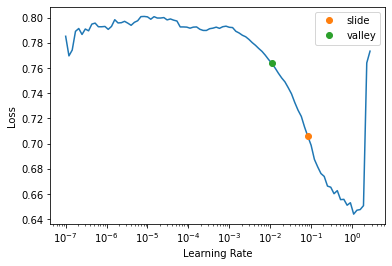

In [59]:
learn.lr_find(suggest_funcs=(slide, valley))

In [62]:
# We will take the average of these two values
lr = (0.8317 + 0.0109) / 2
lr

0.4213

In [64]:
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.568582,0.928428,0.381877,00:00
1,0.462322,0.308781,0.909385,00:00
2,0.434444,0.324669,0.906149,00:00
3,0.425197,0.315994,0.909385,00:00
4,0.421724,0.362757,0.909385,00:00
5,0.405127,0.311448,0.909385,00:00
6,0.395429,0.308486,0.909385,00:00
7,0.389034,0.335442,0.909385,00:00
8,0.382843,0.309330,0.909385,00:00
9,0.380378,0.452236,0.909385,00:00


That was so much easier! And we got a slightly better accuracy with the fancy fastai trainer, likely as a result of them processing the data slightly better than we did by hand. Note that fastai also has methods for filling NA values but I was too lazy to redo the data cleanup until the filling of NAs so we will not experiment with that today. However, it may have improved our accuracy even further by using a more sophisticated method for filling NA values.

### Ensembling

The last thing we will do is try a method called ensembling which is essentially where you take the results of a few different models and take the average to try and get an even more accurate result.

In [69]:
def ensemble(epochs, lr):
    learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])
    with learn.no_bar(),learn.no_logging(): learn.fit(epochs, lr=lr)
    return learn.get_preds(dl=learn.dls.test_dl(df))[0]

In [70]:
learns = [ensemble(20,lr) for _ in range(5)]
ens_preds = torch.stack(learns).mean(0)
ens_preds

tensor([[0.7010, 0.2990],
        [0.9206, 0.0794],
        [0.9177, 0.0823],
        ...,
        [0.9103, 0.0897],
        [0.9123, 0.0877],
        [0.9151, 0.0849]])

In [71]:
ens_preds.shape

torch.Size([1548, 2])

In [74]:
learns

[tensor([[0.9304, 0.0696],
         [0.9286, 0.0714],
         [0.9283, 0.0717],
         ...,
         [0.9334, 0.0666],
         [0.9368, 0.0632],
         [0.9318, 0.0682]]),
 tensor([[0.0000, 1.0000],
         [0.9868, 0.0132],
         [0.9867, 0.0133],
         ...,
         [0.9861, 0.0139],
         [0.9467, 0.0533],
         [0.9866, 0.0134]]),
 tensor([[0.9000, 0.1000],
         [0.9000, 0.1000],
         [0.9000, 0.1000],
         ...,
         [0.9000, 0.1000],
         [0.9016, 0.0984],
         [0.9000, 0.1000]]),
 tensor([[0.8928, 0.1072],
         [0.9383, 0.0617],
         [0.9291, 0.0709],
         ...,
         [0.8735, 0.1265],
         [0.9229, 0.0771],
         [0.9002, 0.0998]]),
 tensor([[0.7816, 0.2184],
         [0.8495, 0.1505],
         [0.8445, 0.1555],
         ...,
         [0.8585, 0.1415],
         [0.8538, 0.1462],
         [0.8568, 0.1432]])]

Not exactly sure what is going on here. Will explore at a future date.